In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import cv2

csv_path = "/kaggle/input/fracatlas-original-dataset/FracAtlas/dataset.csv"
df = pd.read_csv(csv_path)

print("📊 Shape:", df.shape)
display(df.head())

fractured_path = "/kaggle/input/fracatlas-original-dataset/FracAtlas/images/Fractured"
non_fractured_path = "/kaggle/input/fracatlas-original-dataset/FracAtlas/images/Non_fractured"

📊 Shape: (4083, 13)


,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
0,IMG0000000.jpg,0,1,0,0,0,0,1,0,0,1,1,0
1,IMG0000001.jpg,0,1,0,0,0,0,1,0,0,1,1,0
2,IMG0000002.jpg,0,1,0,0,0,0,1,0,0,1,1,0
3,IMG0000003.jpg,0,1,0,0,0,0,1,0,0,0,1,1
4,IMG0000004.jpg,0,1,0,0,0,0,1,0,0,0,1,1


In [2]:
print("=== Missing values ===")
display(df.isnull().sum())

print("=== Column types ===")
display(df.dtypes)

print("=== Summary statistics ===")
display(df.describe())

binary_cols = ['fractured', 'hardware', 'multiscan']
for col in binary_cols:
    if col in df.columns:
        print(f"\n➡️ {col}")
        print(df[col].value_counts())

=== Missing values ===


image_id          0
hand              0
leg               0
hip               0
shoulder          0
mixed             0
hardware          0
multiscan         0
fractured         0
fracture_count    0
frontal           0
lateral           0
oblique           0
dtype: int64

=== Column types ===


image_id          object
hand               int64
leg                int64
hip                int64
shoulder           int64
mixed              int64
hardware           int64
multiscan          int64
fractured          int64
fracture_count     int64
frontal            int64
lateral            int64
oblique            int64
dtype: object

=== Summary statistics ===


,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,0.376684,0.556699,0.082782,0.085476,0.097477,0.024247,0.096988,0.175606,0.225814,0.613030,0.365418,0.102376
std,0.484614,0.496836,0.275587,0.279624,0.296643,0.153834,0.295977,0.380531,0.544852,0.487116,0.481606,0.303179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000



➡️ fractured
fractured
0    3366
1     717
Name: count, dtype: int64

➡️ hardware
hardware
0    3984
1      99
Name: count, dtype: int64

➡️ multiscan
multiscan
0    3687
1     396
Name: count, dtype: int64


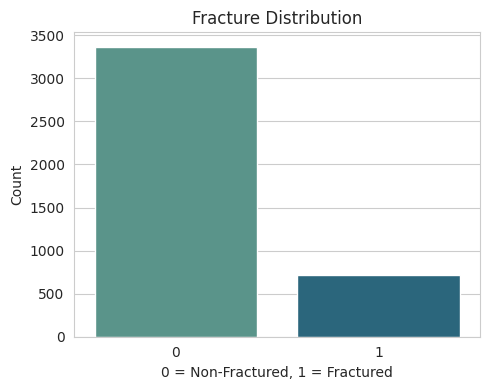

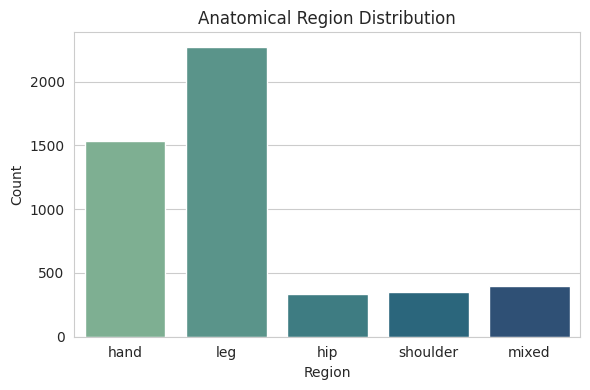

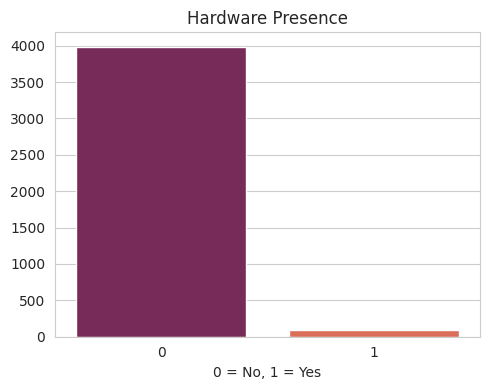

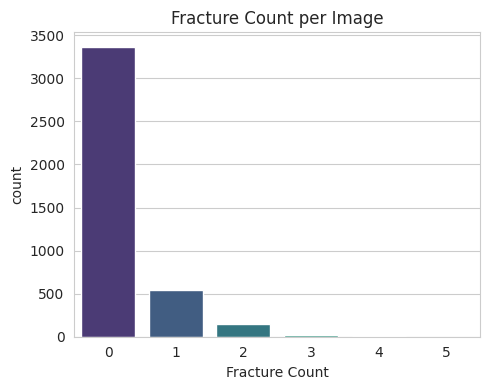

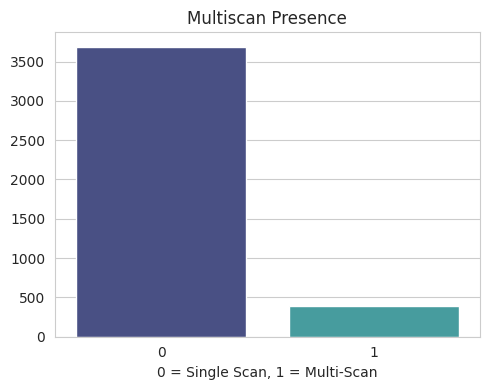

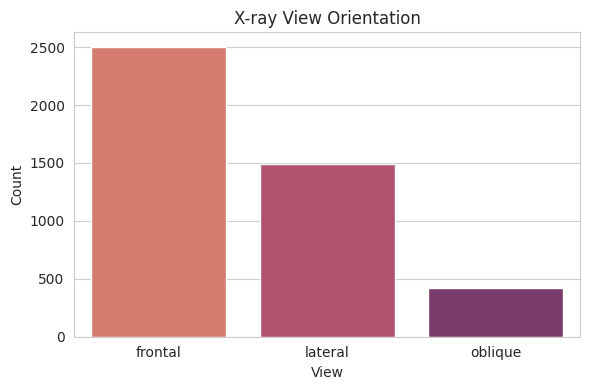

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

# Fracture distribution (ubah jadi barplot)
plt.figure(figsize=(5,4))
sns.barplot(
    x=df['fractured'].value_counts().index,
    y=df['fractured'].value_counts().values,
    palette="crest"
)
plt.title("Fracture Distribution")
plt.xlabel("0 = Non-Fractured, 1 = Fractured")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Region distribution
region_cols = ['hand','leg','hip','shoulder','mixed']
region_counts = {col: df[col].sum() for col in region_cols}
region_df = pd.DataFrame.from_dict(region_counts, orient='index', columns=['Count']).reset_index()
region_df.rename(columns={'index':'Region'}, inplace=True)

plt.figure(figsize=(6,4))
sns.barplot(data=region_df, x='Region', y='Count', palette="crest")
plt.title("Anatomical Region Distribution")
plt.tight_layout()
plt.show()

# Hardware distribution
plt.figure(figsize=(5,4))
sns.barplot(
    x=df['hardware'].value_counts().index,
    y=df['hardware'].value_counts().values,
    palette="rocket"
)
plt.title("Hardware Presence")
plt.xlabel("0 = No, 1 = Yes")
plt.tight_layout()
plt.show()

# Fracture Count
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='fracture_count', palette="viridis")
plt.title("Fracture Count per Image")
plt.xlabel("Fracture Count")
plt.tight_layout()
plt.show()

# Multiscan
plt.figure(figsize=(5,4))
sns.barplot(
    x=df['multiscan'].value_counts().index,
    y=df['multiscan'].value_counts().values,
    palette="mako"
)
plt.title("Multiscan Presence")
plt.xlabel("0 = Single Scan, 1 = Multi-Scan")
plt.tight_layout()
plt.show()

# X-ray View
views = ['frontal','lateral','oblique']
view_counts = {v: df[v].sum() for v in views}
view_df = pd.DataFrame.from_dict(view_counts, orient='index', columns=['Count']).reset_index()
view_df.rename(columns={'index':'View'}, inplace=True)

plt.figure(figsize=(6,4))
sns.barplot(data=view_df, x='View', y='Count', palette="flare")
plt.title("X-ray View Orientation")
plt.tight_layout()
plt.show()

## Merge Original dataset.csv and augmented data

In [4]:
import pandas as pd

csv_path = "/kaggle/input/fracatlas-original-dataset/FracAtlas/dataset.csv"

df = pd.read_csv(csv_path)

print("Before drop:", df.shape)

df = df.drop(columns=["frontal", "lateral", "oblique"], errors="ignore")

print("After drop:", df.shape)

display(df.head())

df.to_csv("/kaggle/working/dataset.csv", index=False)
print("✓ Saved cleaned CSV → /kaggle/working/dataset.csv")

Before drop: (4083, 13)
After drop: (4083, 10)


,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count
0,IMG0000000.jpg,0,1,0,0,0,0,1,0,0
1,IMG0000001.jpg,0,1,0,0,0,0,1,0,0
2,IMG0000002.jpg,0,1,0,0,0,0,1,0,0
3,IMG0000003.jpg,0,1,0,0,0,0,1,0,0
4,IMG0000004.jpg,0,1,0,0,0,0,1,0,0


✓ Saved cleaned CSV → /kaggle/working/dataset.csv


In [5]:
import os, glob, pandas as pd
from tqdm import tqdm

root = "/kaggle/input/fracatlas-augmented-fixed"
splits = ["train", "valid", "test"]
names = ["fractured","hand","hardware","hip","leg","shoulder"]
rows = []

all_txt = []
for split in splits:
    label_dir = os.path.join(root, split, "labels")
    all_txt.extend(glob.glob(os.path.join(label_dir, "*.txt")))

for txt_path in tqdm(all_txt, desc="Processing labels"):
    split = txt_path.split("/")[-3]
    image_dir = os.path.join(root, split, "images")
    img_name = os.path.basename(txt_path).replace(".txt", ".jpg")

    flags = {name:0 for name in names}
    fracture_count = 0

    with open(txt_path) as f:
        for ln in f:
            cls = int(ln.split()[0])
            cls_name = names[cls]
            flags[cls_name] = 1
            if cls_name == "fractured":
                fracture_count += 1

    region_count = flags["hand"] + flags["hip"] + flags["leg"] + flags["shoulder"]
    mixed = 1 if region_count > 1 else 0

    rows.append({"image_id":img_name, **flags, "mixed":mixed, "fracture_count":fracture_count})

df_new = pd.DataFrame(rows)
df_old = pd.read_csv("/kaggle/input/fracatlas-original-dataset/FracAtlas/dataset.csv")

print("Original dataset:", len(df_old))
print("Added augmented:", len(df_new))
print("Total:", len(df_old) + len(df_new))

final_df = pd.concat([df_old, df_new], ignore_index=True)
final_df.to_csv("/kaggle/working/dataset_appended.csv", index=False)
final_df.head()

Processing labels: 100%|██████████| 8409/8409 [00:39<00:00, 213.43it/s]


Original dataset: 4083
Added augmented: 8409
Total: 12492


,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
0,IMG0000000.jpg,0,1,0,0,0,0,1.0,0,0,1.0,1.0,0.0
1,IMG0000001.jpg,0,1,0,0,0,0,1.0,0,0,1.0,1.0,0.0
2,IMG0000002.jpg,0,1,0,0,0,0,1.0,0,0,1.0,1.0,0.0
3,IMG0000003.jpg,0,1,0,0,0,0,1.0,0,0,0.0,1.0,1.0
4,IMG0000004.jpg,0,1,0,0,0,0,1.0,0,0,0.0,1.0,1.0


In [6]:
import os, glob, pandas as pd
from tqdm import tqdm

root = "/kaggle/input/fracatlas-augmented-fixed"
names = ["fractured","hand","hardware","hip","leg","shoulder"]
rows = []

label_dir = os.path.join(root, "test", "labels")
image_dir = os.path.join(root, "test", "images")
txt_files = glob.glob(os.path.join(label_dir, "*.txt"))

for txt_path in tqdm(txt_files, desc="Processing TEST labels"):
    img_name = os.path.basename(txt_path).replace(".txt", ".jpg")

    flags = {name:0 for name in names}
    fracture_count = 0

    with open(txt_path) as f:
        for ln in f:
            cls = int(ln.split()[0])
            cls_name = names[cls]
            flags[cls_name] = 1
            if cls_name == "fractured":
                fracture_count += 1

    region_count = flags["hand"] + flags["hip"] + flags["leg"] + flags["shoulder"]
    mixed = 1 if region_count > 1 else 0

    rows.append({"image_id":img_name, **flags, "mixed":mixed, "fracture_count":fracture_count})

df_test_labels = pd.DataFrame(rows)

print("Total TEST samples:", len(df_test_labels))

df_test_labels.to_csv("/kaggle/working/test_multilabel_gt.csv", index=False)
df_test_labels.head()

Processing TEST labels: 100%|██████████| 394/394 [00:00<00:00, 988.93it/s]


Total TEST samples: 394


,image_id,fractured,hand,hardware,hip,leg,shoulder,mixed,fracture_count
0,IMG0002757_jpg.rf.e56ee49bd2bca9b69d77976b4575...,0,0,0,0,1,0,0,0
1,IMG0003077_jpg.rf.16db8b22ebcb4548a99f703a301c...,1,0,0,0,1,0,0,1
2,IMG0002289_jpg.rf.c93e599416ae31397ae014894365...,0,0,0,0,1,0,0,0
3,IMG0001601_jpg.rf.95d36896a14ee031472ba579cb2f...,0,1,0,0,0,0,0,0
4,IMG0001456_jpg.rf.5346ce41c966f2bd1cbc6b46538b...,0,0,0,0,1,0,0,0


## Evaluate and Integrate with Rule-based Classification

In [7]:
!pip install ultralytics==8.3.20 opencv-python --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 92.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Yolo V11

In [8]:
import torch
import ultralytics
torch.__version__, ultralytics.__version__

from ultralytics import YOLO
model = YOLO("/kaggle/input/yolov11-pt/detect/train4/weights/best.pt")
print("MODEL LOADED!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
MODEL LOADED!


#### Inference on 1 data


image 1/1 /kaggle/input/fracatlas-original-dataset/FracAtlas/images/Non_fractured/IMG0001357.jpg: 640x544 1 hand, 41.9ms
Speed: 12.3ms preprocess, 41.9ms inference, 274.9ms postprocess per image at shape (1, 3, 640, 544)


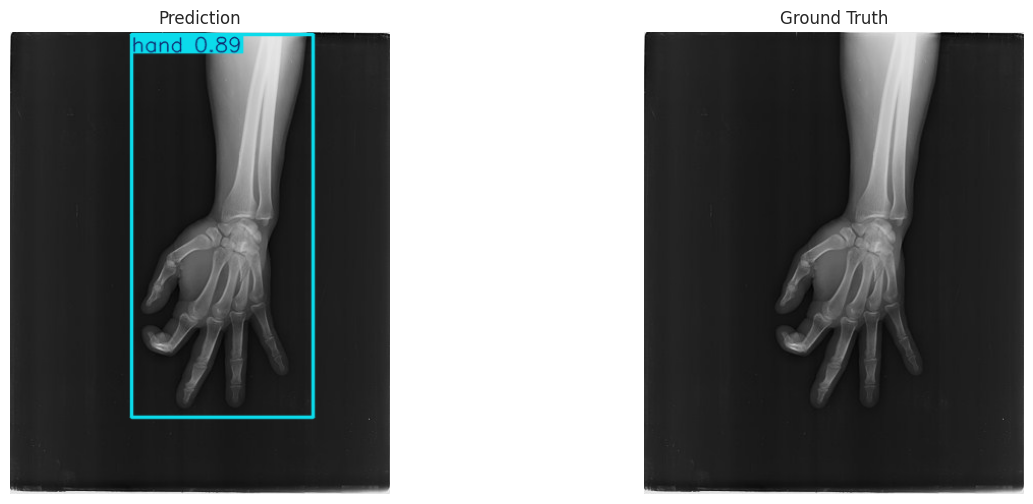

IMAGE: IMG0001357.jpg

GROUND TRUTH BOXES: []

PREDICTED BOXES:
hand | conf=0.89 | [119.73090362548828, 2.4332809448242188, 297.0646057128906, 378.7687683105469]


,Label,Ground Truth,Prediction
0,fractured,0,0
1,hand,1,1
2,hardware,0,0
3,hip,0,0
4,leg,0,0
5,shoulder,0,0
6,mixed,0,0
7,fracture_count,0,0


In [9]:
import os, random, cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("/kaggle/input/yolov11-pt/detect/train4/weights/best.pt")

test_csv_path = "/kaggle/working/dataset_appended.csv"
df = pd.read_csv(test_csv_path)

aug_img_dir = "/kaggle/input/fracatlas-augmented-fixed/test/images"
aug_lbl_dir = "/kaggle/input/fracatlas-augmented-fixed/test/labels"

orig_img_dirs = [
    "/kaggle/input/fracatlas-original-dataset/FracAtlas/images/Fractured",
    "/kaggle/input/fracatlas-original-dataset/FracAtlas/images/Non_fractured",
]
orig_lbl_dir = "/kaggle/input/fracatlas-original-dataset/FracAtlas/Annotations/YOLO"

aug_files = os.listdir(aug_img_dir)
orig_files = []
for d in orig_img_dirs: orig_files += os.listdir(d)
all_files = aug_files + orig_files
sample = random.choice(all_files)

if "rf." in sample:
    img_path = f"{aug_img_dir}/{sample}"
    lbl_path = f"{aug_lbl_dir}/{sample.replace('.jpg','.txt').replace('.png','.txt')}"
else:
    for d in orig_img_dirs:
        if sample in os.listdir(d): img_path = f"{d}/{sample}"; break
    lbl_path = f"{orig_lbl_dir}/{sample.replace('.jpg','.txt').replace('.png','.txt')}"

img = cv2.imread(img_path)
h, w = img.shape[:2]

gt_boxes = []
if os.path.exists(lbl_path):
    with open(lbl_path,"r") as f:
        for line in f:
            c, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = int((cx - bw/2) * w); y1 = int((cy - bh/2) * h)
            x2 = int((cx + bw/2) * w); y2 = int((cy + bh/2) * h)
            gt_boxes.append((int(c), x1, y1, x2, y2))

res = model(img_path)[0]
pred_img = res.plot()[:, :, ::-1]

region_counts = {"fractured":0, "hand":0, "hardware":0, "hip":0, "leg":0, "shoulder":0}
fracture_count = 0

pred_classes = []

for b in res.boxes:
    cls = int(b.cls)
    name = model.names[cls].lower()
    pred_classes.append(name)
    if name in region_counts: region_counts[name] += 1
    if name == "fractured": fracture_count += 1

unique_pred = len(set(pred_classes))
mixed = 1 if unique_pred >= 2 else 0

gt_img = img.copy()
for cls, x1, y1, x2, y2 in gt_boxes:
    cv2.rectangle(gt_img,(x1,y1),(x2,y2),(0,255,0),3)
    cv2.putText(gt_img,f"{model.names[cls]}",(x1,y1-10),
                cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1); plt.title("Prediction"); plt.imshow(pred_img); plt.axis("off")
plt.subplot(1,2,2); plt.title("Ground Truth"); plt.imshow(cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.show()

csv_row = df[df["image_id"] == sample].iloc[0] if sample in df["image_id"].values else None
gt_label_csv = None if csv_row is None else {
    "fractured": int(csv_row["fractured"]),
    "hand": int(csv_row["hand"]),
    "hardware": int(csv_row["hardware"]),
    "hip": int(csv_row["hip"]),
    "leg": int(csv_row["leg"]),
    "shoulder": int(csv_row["shoulder"]),
    "mixed": int(csv_row["mixed"]),
    "fracture_count": int(csv_row["fracture_count"]),
}

pred_label = {
    "fractured": region_counts["fractured"],
    "hand": region_counts["hand"],
    "hardware": region_counts["hardware"],
    "hip": region_counts["hip"],
    "leg": region_counts["leg"],
    "shoulder": region_counts["shoulder"],
    "mixed": mixed,
    "fracture_count": fracture_count,
}

table = pd.DataFrame({
    "Label": list(pred_label.keys()),
    "Ground Truth": [None if gt_label_csv is None else gt_label_csv[k] for k in pred_label.keys()],
    "Prediction": [pred_label[k] for k in pred_label.keys()]
})

print("IMAGE:", sample)
print("\nGROUND TRUTH BOXES:", gt_boxes)
print("\nPREDICTED BOXES:")
for b in res.boxes:
    cls = int(b.cls)
    conf = float(b.conf)
    xyxy = b.xyxy.cpu().numpy().tolist()[0]
    print(f"{model.names[cls]} | conf={conf:.2f} | {xyxy}")

table

#### Bounding Box Prediction Evaluation

In [10]:
import yaml
from ultralytics import YOLO
import pandas as pd

yaml_path = "/kaggle/working/fracatlas_test.yaml"
yaml_data = {
    "path": "/kaggle/input/fracatlas-augmented-fixed",
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "names": ["fractured", "hand", "hardware", "hip", "leg", "shoulder"],
    "nc": 6
}
with open(yaml_path, "w") as f:
    yaml.dump(yaml_data, f)

model = YOLO("/kaggle/input/yolov11-pt/detect/train4/weights/last.pt")
names = yaml_data["names"]

metrics_val = model.val(data=yaml_path, split="val", verbose=False, plots=False)
metrics_test = model.val(data=yaml_path, split="test", verbose=False, plots=False)

overall_val_df = pd.DataFrame({
    "Metric": ["mAP@50", "mAP@50-95", "Mean Precision", "Mean Recall"],
    "Value": [
        round(float(metrics_val.box.map50), 4),
        round(float(metrics_val.box.map), 4),
        round(float(metrics_val.box.mp), 4),
        round(float(metrics_val.box.mr), 4)
    ]
})

per_class_val_df = pd.DataFrame({
    "Class": names,
    "Precision": [round(float(x), 4) for x in metrics_val.box.p],
    "Recall":    [round(float(x), 4) for x in metrics_val.box.r],
    "AP50":      [round(float(x), 4) for x in metrics_val.box.ap50],
    "AP50-95":   [round(float(x), 4) for x in metrics_val.box.ap]
})

overall_test_df = pd.DataFrame({
    "Metric": ["mAP@50", "mAP@50-95", "Mean Precision", "Mean Recall"],
    "Value": [
        round(float(metrics_test.box.map50), 4),
        round(float(metrics_test.box.map), 4),
        round(float(metrics_test.box.mp), 4),
        round(float(metrics_test.box.mr), 4)
    ]
})

per_class_test_df = pd.DataFrame({
    "Class": names,
    "Precision": [round(float(x), 4) for x in metrics_test.box.p],
    "Recall":    [round(float(x), 4) for x in metrics_test.box.r],
    "AP50":      [round(float(x), 4) for x in metrics_test.box.ap50],
    "AP50-95":   [round(float(x), 4) for x in metrics_test.box.ap]
})

def show(df, title):
    print("\n" + title)
    print(df.to_string(index=False))

show(overall_val_df, "📌 Overall Metrics – Validation")
show(per_class_val_df, "📌 Per-Class Metrics – Validation")

show(overall_test_df, "📌 Overall Metrics – Test")
show(per_class_test_df, "📌 Per-Class Metrics – Test")

Ultralytics 8.3.20 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 113MB/s]
val: Scanning /kaggle/input/fracatlas-augmented-fixed/valid/labels... 789 images, 0 backgrounds, 0 corrupt: 100%|██████████| 789/789 [00:02<00:00, 388.39it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/fracatlas-augmented-fixed/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.22it/s]


                   all        789       1152      0.869      0.839      0.849      0.541
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Ultralytics 8.3.20 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/input/fracatlas-augmented-fixed/test/labels... 394 images, 0 backgrounds, 0 corrupt: 100%|██████████| 394/394 [00:01<00:00, 389.03it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fracatlas-augmented-fixed/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.17it/s]

                   all        394        576      0.883      0.839      0.847      0.527
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image

📌 Overall Metrics – Validation
        Metric  Value
        mAP@50 0.8493
     mAP@50-95 0.5410
Mean Precision 0.8685
   Mean Recall 0.8395

📌 Per-Class Metrics – Validation
    Class  Precision  Recall   AP50  AP50-95
fractured     0.7065  0.3895 0.4523   0.1702
     hand     0.9559  0.9793 0.9744   0.7660
 hardware     0.7979  0.7586 0.7715   0.4153
      hip     0.9321  0.9841 0.9557   0.6900
      leg     0.9662  0.9829 0.9883   0.8057
 shoulder     0.8527  0.9423 0.9535   0.3986

📌 Overall Metrics – Test
        Metric  Value
        mAP@50 0.8467
     mAP@50-95 0.5268
Mean Precision 0.8831
   Mean Recall 0.8390

📌 Per-Class Metrics – Test
    Class  Precision  Recall   AP50  AP50-95
fractured     0.7639  0.3415 0.4174   0.1393
     hand     0.9605  0.9396 0.9735   0.7713
 hardware     0.7219  0.8000 0.7359   0

#### Multi-label Classification Prediction Evaluation

In [12]:
import os, cv2, numpy as np, pandas as pd
from ultralytics import YOLO
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, average_precision_score
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

yaml_data = {
    "path": "/kaggle/input/fracatlas-augmented-fixed",
    "test": "test/images",
    "names": ["fractured", "hand", "hardware", "hip", "leg", "shoulder"],
}

TEST_IMG_DIR = f"{yaml_data['path']}/{yaml_data['test']}"
CLASS_NAMES = yaml_data["names"]
REGION_CLASSES = ["hand","hip","leg","shoulder"]

model = YOLO("/kaggle/input/yolov11-pt/detect/train4/weights/best.pt")

df = pd.read_csv("/kaggle/working/dataset_appended.csv")
test_images = sorted(os.listdir(TEST_IMG_DIR))
df = df[df["image_id"].isin(test_images)]

label_cols = ["fractured","hand","hardware","hip","leg","shoulder","mixed","fracture_count"]

y_true = []
y_pred = []

for imgname in tqdm(test_images, desc="Running classification eval"):
    if imgname not in df["image_id"].values:
        continue
    
    row = df[df["image_id"] == imgname].iloc[0]
    gt = [
        int(row["fractured"]), int(row["hand"]), int(row["hardware"]),
        int(row["hip"]), int(row["leg"]), int(row["shoulder"]),
        int(row["mixed"]), int(row["fracture_count"])
    ]
    
    img_path = f"{TEST_IMG_DIR}/{imgname}"
    res = model(img_path, verbose=False)[0]
    
    region_counts = {c: 0 for c in CLASS_NAMES}
    pred_classes = []
    fracture_count = 0
    
    for b in res.boxes:
        cls = int(b.cls)
        name = model.names[cls].lower()
        pred_classes.append(name)
        if name in region_counts:
            region_counts[name] += 1
        if name == "fractured":
            fracture_count += 1
    
    regions_detected = [c for c in REGION_CLASSES if region_counts[c] > 0]
    mixed = 1 if len(regions_detected) >= 2 else 0
    
    pred = [
        1 if region_counts["fractured"] > 0 else 0,
        1 if region_counts["hand"] > 0 else 0,
        1 if region_counts["hardware"] > 0 else 0,
        1 if region_counts["hip"] > 0 else 0,
        1 if region_counts["leg"] > 0 else 0,
        1 if region_counts["shoulder"] > 0 else 0,
        mixed,
        fracture_count
    ]

    y_true.append(gt)
    y_pred.append(pred)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

metrics_rows = []
class_labels = label_cols[:-1]

for i, col in enumerate(class_labels):
    yt = y_true[:, i]
    yp = y_pred[:, i]

    p = precision_score(yt, yp, zero_division=0)
    r = recall_score(yt, yp, zero_division=0)
    f1 = f1_score(yt, yp, zero_division=0)
    acc = accuracy_score(yt, yp)

    try: auc = roc_auc_score(yt, yp)
    except: auc = 0
    try: prc = average_precision_score(yt, yp)
    except: prc = 0

    metrics_rows.append([
        col,
        round(p,4),
        round(r,4),
        round(f1,4),
        round(acc,4),
        round(auc,4),
        round(prc,4)
    ])

class_metrics_df = pd.DataFrame(
    metrics_rows,
    columns=["Label","Precision","Recall","F1","Accuracy","ROC-AUC","PRC-AUC"]
)

fracture_acc = (y_true[:, -1] == y_pred[:, -1]).mean()
fracture_df = pd.DataFrame({
    "Metric": ["Fracture Count Accuracy"],
    "Value": [round(fracture_acc,4)]
})

display(class_metrics_df)
display(fracture_df)

yt_fc = y_true[:, -1]
yp_fc = y_pred[:, -1]

mae = mean_absolute_error(yt_fc, yp_fc)
mse = mean_squared_error(yt_fc, yp_fc)
rmse = np.sqrt(mse)
r2 = r2_score(yt_fc, yp_fc)

fracture_reg_df = pd.DataFrame({
    "Metric": ["Accuracy (Exact Match)", "MAE", "MSE", "RMSE", "R² Score"],
    "Value": [
        round((yt_fc == yp_fc).mean(), 4),
        round(mae, 4),
        round(mse, 4),
        round(rmse, 4),
        round(r2, 4),
    ]
})

display(fracture_reg_df)

Running classification eval: 100%|██████████| 394/394 [00:06<00:00, 64.06it/s]


,Label,Precision,Recall,F1,Accuracy,ROC-AUC,PRC-AUC
0,fractured,0.8125,0.5821,0.6783,0.9061,0.7773,0.5440
1,hand,0.9783,0.9574,0.9677,0.9772,0.9728,0.9519
2,hardware,0.9000,0.9000,0.9000,0.9949,0.9487,0.8125
3,hip,0.9524,1.0000,0.9756,0.9949,0.9972,0.9524
4,leg,0.9742,0.9956,0.9848,0.9822,0.9797,0.9725
5,shoulder,0.9615,1.0000,0.9804,0.9975,0.9986,0.9615
6,mixed,0.8667,0.9750,0.9176,0.9822,0.9790,0.8475


,Metric,Value
0,Fracture Count Accuracy,0.8706


,Metric,Value
0,Accuracy (Exact Match),0.8706
1,MAE,0.1523
2,MSE,0.2081
3,RMSE,0.4562
4,R² Score,0.2034


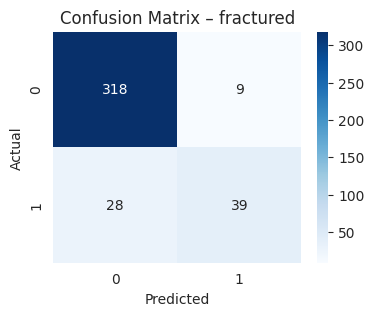

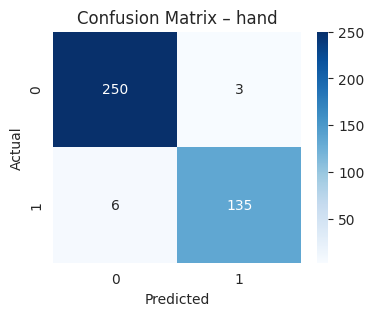

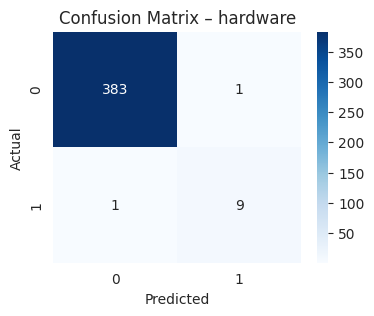

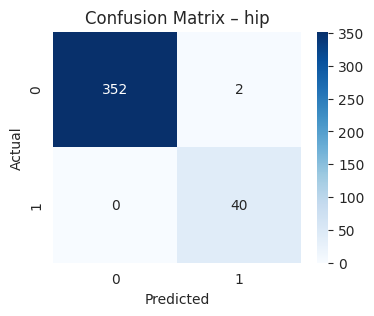

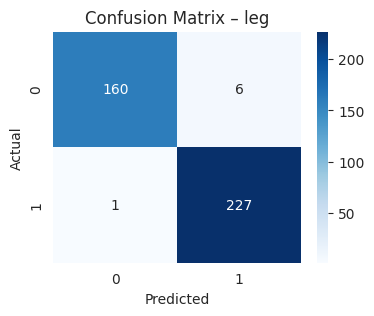

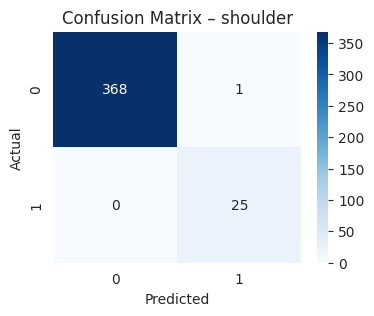

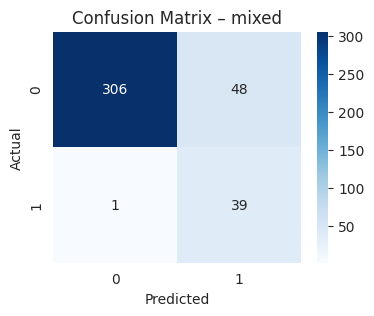

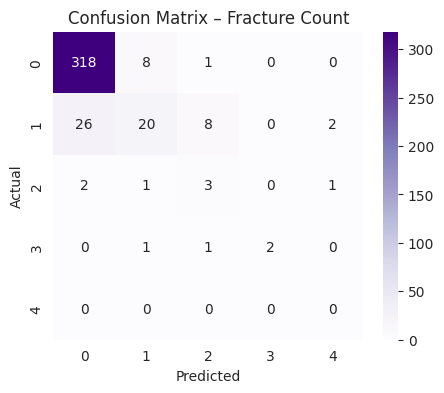

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

figures = {}

for i, col in enumerate(class_labels):
    yt = y_true[:, i]
    yp = y_pred[:, i]
    cm = confusion_matrix(yt, yp)

    fig, ax = plt.subplots(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["0","1"],
                yticklabels=["0","1"],
                ax=ax)
    ax.set_title(f"Confusion Matrix – {col}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    plt.show()

yt_fc = y_true[:, -1]   # fracture_count GT
yp_fc = y_pred[:, -1]   # fracture_count Pred

unique_vals = sorted(list(set(yt_fc.tolist() + yp_fc.tolist())))

cm_fc = confusion_matrix(yt_fc, yp_fc, labels=unique_vals)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm_fc, annot=True, fmt="d", cmap="Purples",
            xticklabels=[f"{v}" for v in unique_vals],
            yticklabels=[f"{v}" for v in unique_vals],
            ax=ax)

ax.set_title("Confusion Matrix – Fracture Count")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

plt.show()

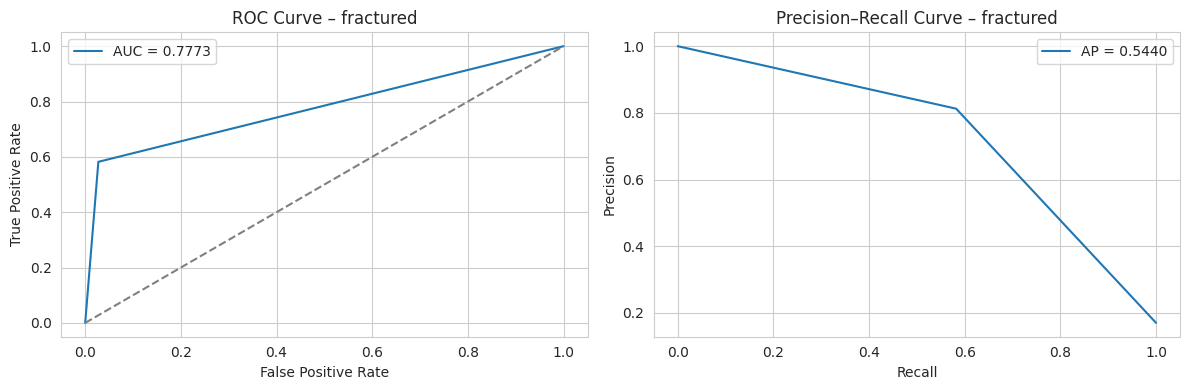

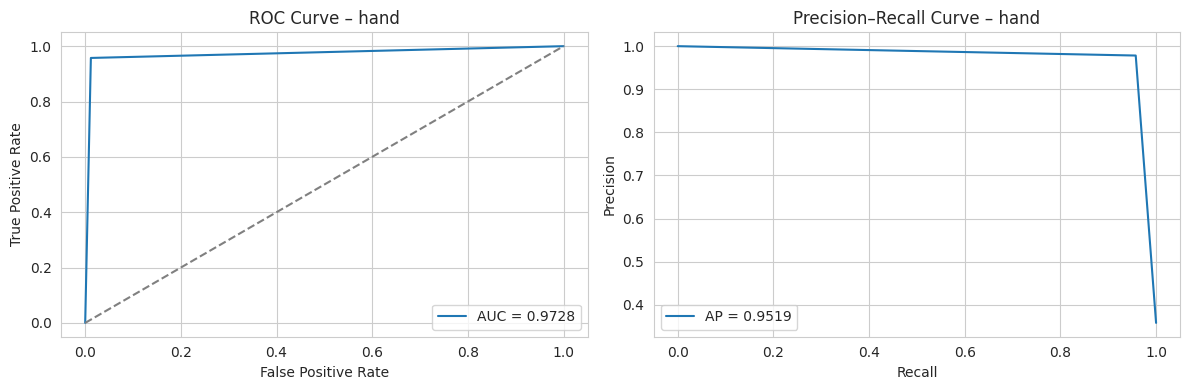

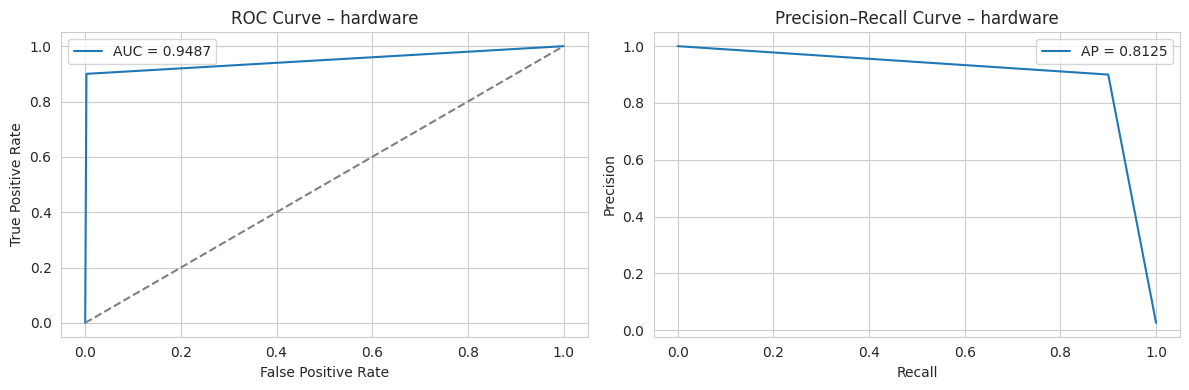

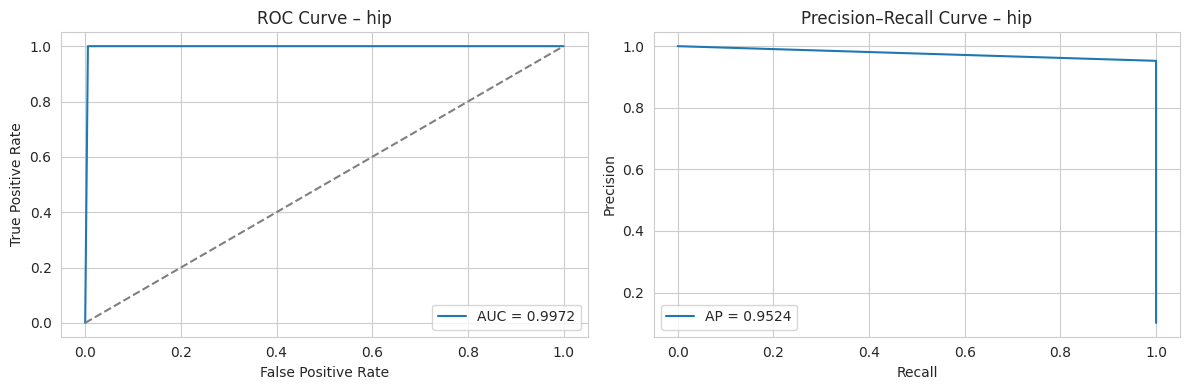

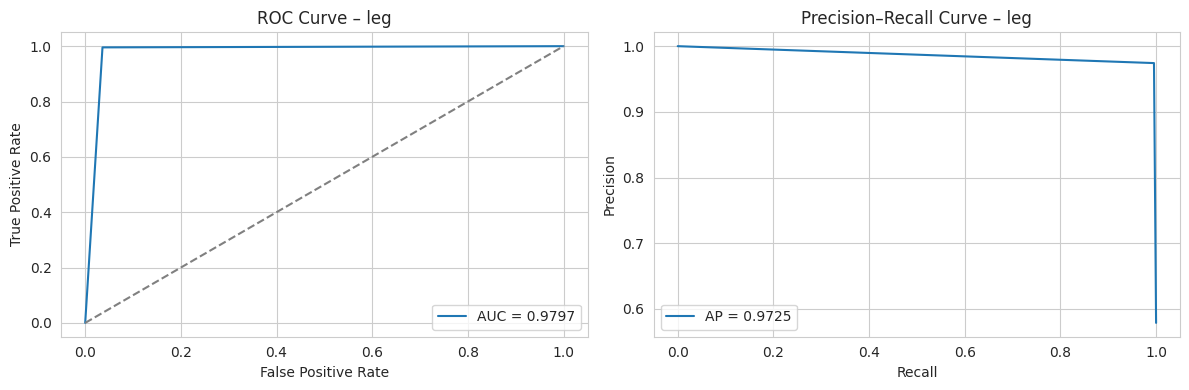

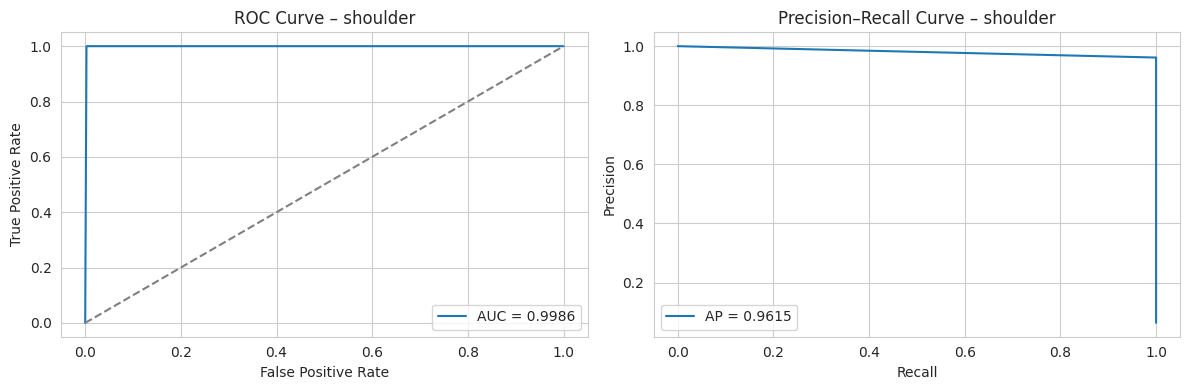

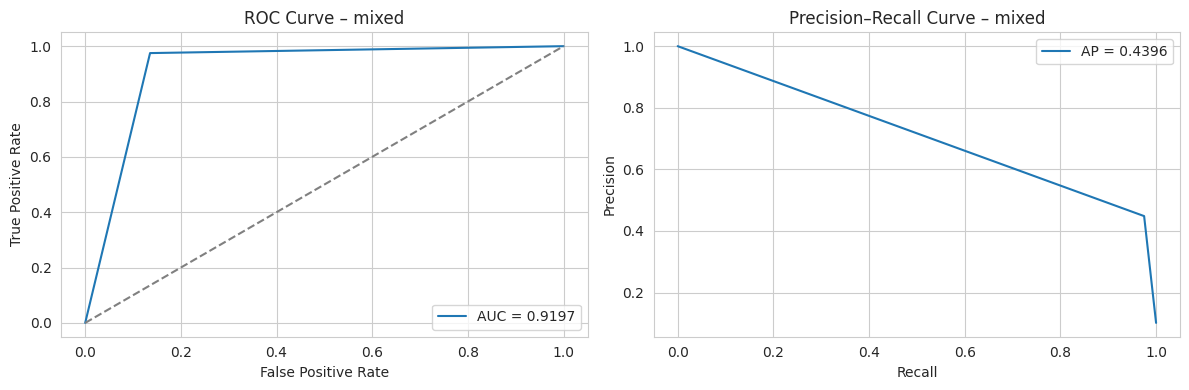

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)

# ============================
# PLOT ROC & PRC PER LABEL
# ============================
binary_labels = label_cols[:-1]  # skip fracture_count

for i, col in enumerate(binary_labels):
    yt = y_true[:, i]
    yp = y_pred[:, i]
    
    # If class has only 0 or only 1 → cannot compute curves
    if len(np.unique(yt)) < 2:
        print(f"⚠️ Skipped {col}: Only one class present")
        continue
    
    # Compute scores
    try:
        roc_auc = roc_auc_score(yt, yp)
        fpr, tpr, _ = roc_curve(yt, yp)
    except:
        roc_auc = None
        fpr, tpr = None, None

    try:
        pr_auc = average_precision_score(yt, yp)
        precision, recall, _ = precision_recall_curve(yt, yp)
    except:
        pr_auc = None
        precision, recall = None, None
    
    # ======================
    # PLOT 1 ROW × 2 COLUMNS
    # ======================
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ---------- ROC CURVE ----------
    ax = axes[0]
    if roc_auc is not None:
        ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
    ax.set_title(f"ROC Curve – {col}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()

    # ---------- PRC CURVE ----------
    ax = axes[1]
    if pr_auc is not None:
        ax.plot(recall, precision, label=f"AP = {pr_auc:.4f}")
    ax.set_title(f"Precision–Recall Curve – {col}")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.legend()

    plt.tight_layout()
    plt.show()

### YOLO V-8

In [23]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [24]:
# =======================================
# 1. SAVE FIXED data.yaml
# =======================================
import yaml

yaml_path = "/kaggle/working/fracatlas_data.yaml"

new_yaml = {
    "path": "/kaggle/input/fracatlas-augmented-fixed",
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "names": ["fractured", "hand", "hardware", "hip", "leg", "shoulder"],
    "nc": 6
}

with open(yaml_path, "w") as f:
    yaml.dump(new_yaml, f)

print("✓ YAML saved:", yaml_path)
print(open(yaml_path).read())


# =======================================
# 2. TRAIN YOLOv8s (clean, stable)
# =======================================
from ultralytics import YOLO
import os

# disable wandb (aman)
os.environ["WANDB_DISABLED"] = "true"

model = YOLO("/kaggle/input/yolov8/pytorch/default/1/yolov8s.pt")

# results = model.train(
#     data=yaml_path,      
#     epochs=50,
#     imgsz=640,
#     batch=16,
#     device=0,
#     workers=4,
#     project="/kaggle/working/yolov8_train",
#     name="fracatlas_v8s",
#     exist_ok=True,
#     verbose=True
# )

# results

✓ YAML saved: /kaggle/working/fracatlas_data.yaml
names:
- fractured
- hand
- hardware
- hip
- leg
- shoulder
nc: 6
path: /kaggle/input/fracatlas-augmented-fixed
test: test/images
train: train/images
val: valid/images



In [25]:
import yaml
from ultralytics import YOLO
import pandas as pd

yaml_path = "/kaggle/working/fracatlas_test.yaml"
yaml_data = {
    "path": "/kaggle/input/fracatlas-augmented-fixed",
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "names": ["fractured", "hand", "hardware", "hip", "leg", "shoulder"],
    "nc": 6
}
with open(yaml_path, "w") as f:
    yaml.dump(yaml_data, f)

model = YOLO("/kaggle/input/yolov8-models/yolov8_train/fracatlas_v8s/weights/best.pt")
names = yaml_data["names"]

metrics_val = model.val(data=yaml_path, split="val", verbose=False, plots=False)
metrics_test = model.val(data=yaml_path, split="test", verbose=False, plots=False)

overall_val_df = pd.DataFrame({
    "Metric": ["mAP@50", "mAP@50-95", "Mean Precision", "Mean Recall"],
    "Value": [
        round(float(metrics_val.box.map50), 4),
        round(float(metrics_val.box.map), 4),
        round(float(metrics_val.box.mp), 4),
        round(float(metrics_val.box.mr), 4)
    ]
})

per_class_val_df = pd.DataFrame({
    "Class": names,
    "Precision": [round(float(x), 4) for x in metrics_val.box.p],
    "Recall":    [round(float(x), 4) for x in metrics_val.box.r],
    "AP50":      [round(float(x), 4) for x in metrics_val.box.ap50],
    "AP50-95":   [round(float(x), 4) for x in metrics_val.box.ap]
})

overall_test_df = pd.DataFrame({
    "Metric": ["mAP@50", "mAP@50-95", "Mean Precision", "Mean Recall"],
    "Value": [
        round(float(metrics_test.box.map50), 4),
        round(float(metrics_test.box.map), 4),
        round(float(metrics_test.box.mp), 4),
        round(float(metrics_test.box.mr), 4)
    ]
})

per_class_test_df = pd.DataFrame({
    "Class": names,
    "Precision": [round(float(x), 4) for x in metrics_test.box.p],
    "Recall":    [round(float(x), 4) for x in metrics_test.box.r],
    "AP50":      [round(float(x), 4) for x in metrics_test.box.ap50],
    "AP50-95":   [round(float(x), 4) for x in metrics_test.box.ap]
})

def show(df, title):
    print("\n" + title)
    print(df.to_string(index=False))

show(overall_val_df, "📌 Overall Metrics – Validation")
show(per_class_val_df, "📌 Per-Class Metrics – Validation")

show(overall_test_df, "📌 Overall Metrics – Test")
show(per_class_test_df, "📌 Per-Class Metrics – Test")

Ultralytics 8.3.20 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/input/fracatlas-augmented-fixed/valid/labels... 789 images, 0 backgrounds, 0 corrupt: 100%|██████████| 789/789 [00:01<00:00, 486.89it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fracatlas-augmented-fixed/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.70it/s]

                   all        789       1152      0.871      0.853      0.853      0.555
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Ultralytics 8.3.20 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)



val: Scanning /kaggle/input/fracatlas-augmented-fixed/test/labels... 394 images, 0 backgrounds, 0 corrupt: 100%|██████████| 394/394 [00:00<00:00, 502.62it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fracatlas-augmented-fixed/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.11it/s]

                   all        394        576      0.865      0.849      0.845      0.547
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 0.9ms postprocess per image

📌 Overall Metrics – Validation
        Metric  Value
        mAP@50 0.8531
     mAP@50-95 0.5546
Mean Precision 0.8713
   Mean Recall 0.8533

📌 Per-Class Metrics – Validation
    Class  Precision  Recall   AP50  AP50-95
fractured     0.7141  0.4793 0.4927   0.1944
     hand     0.9513  0.9710 0.9743   0.7572
 hardware     0.8509  0.7872 0.7585   0.4408
      hip     0.8818  0.9472 0.9479   0.6963
      leg     0.9624  0.9737 0.9861   0.7998
 shoulder     0.8675  0.9615 0.9592   0.4388

📌 Overall Metrics – Test
        Metric  Value
        mAP@50 0.8447
     mAP@50-95 0.5466
Mean Precision 0.8646
   Mean Recall 0.8490

📌 Per-Class Metrics – Test
    Class  Precision  Recall   AP50  AP50-95
fractured     0.6845  0.3969 0.4492   0.1792
     hand     0.9516  0.9233 0.9681   0.7516
 hardware     0.7178  0.8000 0.6860   0

In [13]:
import os, cv2, numpy as np, pandas as pd
from ultralytics import YOLO
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, average_precision_score
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

yaml_data = {
    "path": "/kaggle/input/fracatlas-augmented-fixed",
    "test": "test/images",
    "names": ["fractured", "hand", "hardware", "hip", "leg", "shoulder"],
}

TEST_IMG_DIR = f"{yaml_data['path']}/{yaml_data['test']}"
CLASS_NAMES = yaml_data["names"]
REGION_CLASSES = ["hand","hip","leg","shoulder"]

model = YOLO("/kaggle/input/yolov8-models/yolov8_train/fracatlas_v8s/weights/best.pt")

df = pd.read_csv("/kaggle/working/dataset_appended.csv")
test_images = sorted(os.listdir(TEST_IMG_DIR))
df = df[df["image_id"].isin(test_images)]

label_cols = ["fractured","hand","hardware","hip","leg","shoulder","mixed","fracture_count"]

y_true = []
y_pred = []

for imgname in tqdm(test_images, desc="Running classification eval"):
    if imgname not in df["image_id"].values:
        continue
    
    row = df[df["image_id"] == imgname].iloc[0]
    gt = [
        int(row["fractured"]), int(row["hand"]), int(row["hardware"]),
        int(row["hip"]), int(row["leg"]), int(row["shoulder"]),
        int(row["mixed"]), int(row["fracture_count"])
    ]
    
    img_path = f"{TEST_IMG_DIR}/{imgname}"
    res = model(img_path, verbose=False)[0]
    
    region_counts = {c: 0 for c in CLASS_NAMES}
    pred_classes = []
    fracture_count = 0
    
    for b in res.boxes:
        cls = int(b.cls)
        name = model.names[cls].lower()
        pred_classes.append(name)
        if name in region_counts:
            region_counts[name] += 1
        if name == "fractured":
            fracture_count += 1

    regions_detected = [c for c in REGION_CLASSES if region_counts[c] > 0]
    mixed = 1 if len(regions_detected) >= 2 else 0
    
    pred = [
        1 if region_counts["fractured"] > 0 else 0,
        1 if region_counts["hand"] > 0 else 0,
        1 if region_counts["hardware"] > 0 else 0,
        1 if region_counts["hip"] > 0 else 0,
        1 if region_counts["leg"] > 0 else 0,
        1 if region_counts["shoulder"] > 0 else 0,
        mixed,
        fracture_count
    ]

    y_true.append(gt)
    y_pred.append(pred)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

metrics_rows = []
class_labels = label_cols[:-1]

for i, col in enumerate(class_labels):
    yt = y_true[:, i]
    yp = y_pred[:, i]

    p = precision_score(yt, yp, zero_division=0)
    r = recall_score(yt, yp, zero_division=0)
    f1 = f1_score(yt, yp, zero_division=0)
    acc = accuracy_score(yt, yp)

    try: auc = roc_auc_score(yt, yp)
    except: auc = 0
    try: prc = average_precision_score(yt, yp)
    except: prc = 0

    metrics_rows.append([
        col,
        round(p,4),
        round(r,4),
        round(f1,4),
        round(acc,4),
        round(auc,4),
        round(prc,4)
    ])

class_metrics_df = pd.DataFrame(
    metrics_rows,
    columns=["Label","Precision","Recall","F1","Accuracy","ROC-AUC","PRC-AUC"]
)

fracture_acc = (y_true[:, -1] == y_pred[:, -1]).mean()
fracture_df = pd.DataFrame({
    "Metric": ["Fracture Count Accuracy"],
    "Value": [round(fracture_acc,4)]
})

display(class_metrics_df)
display(fracture_df)

yt_fc = y_true[:, -1]
yp_fc = y_pred[:, -1]

mae = mean_absolute_error(yt_fc, yp_fc)
mse = mean_squared_error(yt_fc, yp_fc)
rmse = np.sqrt(mse)
r2 = r2_score(yt_fc, yp_fc)

fracture_reg_df = pd.DataFrame({
    "Metric": ["Accuracy (Exact Match)", "MAE", "MSE", "RMSE", "R² Score"],
    "Value": [
        round((yt_fc == yp_fc).mean(), 4),
        round(mae, 4),
        round(mse, 4),
        round(rmse, 4),
        round(r2, 4),
    ]
})

display(fracture_reg_df)

Running classification eval: 100%|██████████| 394/394 [00:06<00:00, 63.49it/s]


,Label,Precision,Recall,F1,Accuracy,ROC-AUC,PRC-AUC
0,fractured,0.8868,0.7015,0.7833,0.9340,0.8416,0.6728
1,hand,0.9574,0.9574,0.9574,0.9695,0.9669,0.9319
2,hardware,0.8182,0.9000,0.8571,0.9924,0.9474,0.7389
3,hip,0.8696,1.0000,0.9302,0.9848,0.9915,0.8696
4,leg,0.9540,1.0000,0.9764,0.9721,0.9669,0.9540
5,shoulder,0.9259,1.0000,0.9615,0.9949,0.9973,0.9259
6,mixed,0.6724,0.9750,0.7959,0.9492,0.9607,0.6581


,Metric,Value
0,Fracture Count Accuracy,0.9137


,Metric,Value
0,Accuracy (Exact Match),0.9137
1,MAE,0.0939
2,MSE,0.1142
3,RMSE,0.3380
4,R² Score,0.5628


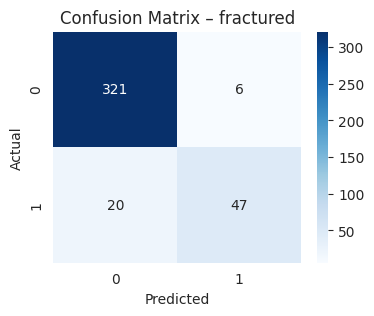

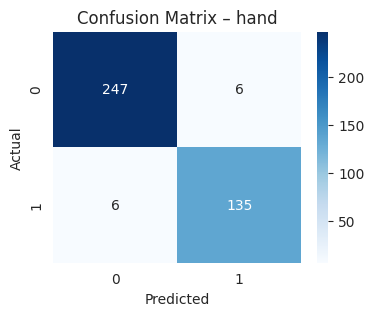

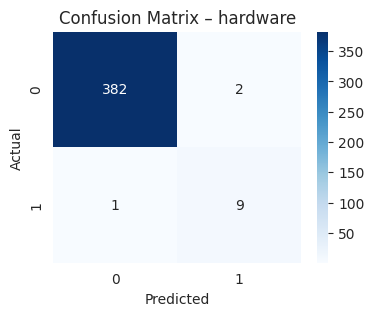

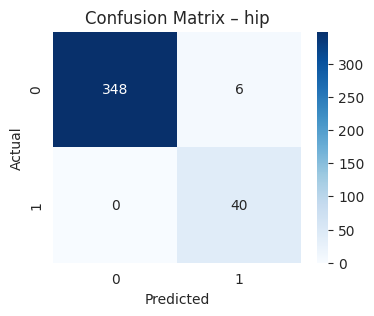

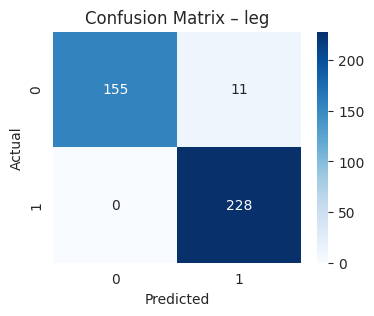

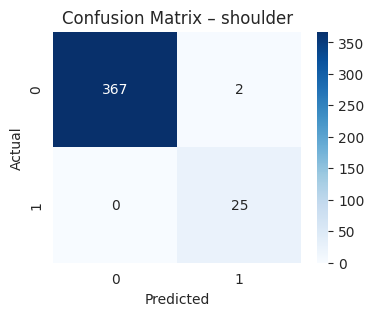

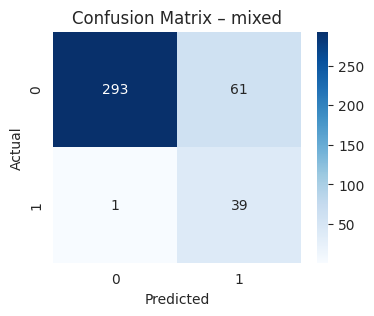

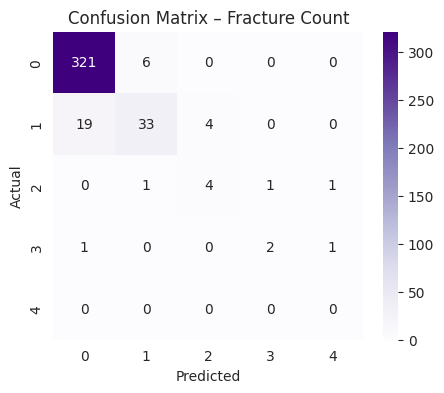

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

figures = {}

for i, col in enumerate(class_labels):
    yt = y_true[:, i]
    yp = y_pred[:, i]
    cm = confusion_matrix(yt, yp)

    fig, ax = plt.subplots(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["0","1"],
                yticklabels=["0","1"],
                ax=ax)
    ax.set_title(f"Confusion Matrix – {col}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    plt.show()

# ===========================
# CONFUSION MATRIX for fracture_count (multi-class)
# ===========================
yt_fc = y_true[:, -1]   # fracture_count GT
yp_fc = y_pred[:, -1]   # fracture_count Pred

unique_vals = sorted(list(set(yt_fc.tolist() + yp_fc.tolist())))

cm_fc = confusion_matrix(yt_fc, yp_fc, labels=unique_vals)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm_fc, annot=True, fmt="d", cmap="Purples",
            xticklabels=[f"{v}" for v in unique_vals],
            yticklabels=[f"{v}" for v in unique_vals],
            ax=ax)

ax.set_title("Confusion Matrix – Fracture Count")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

plt.show()

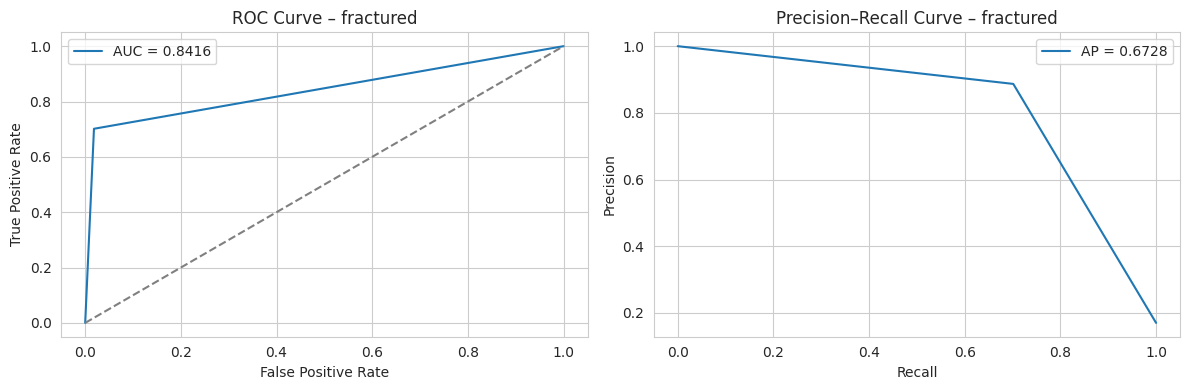

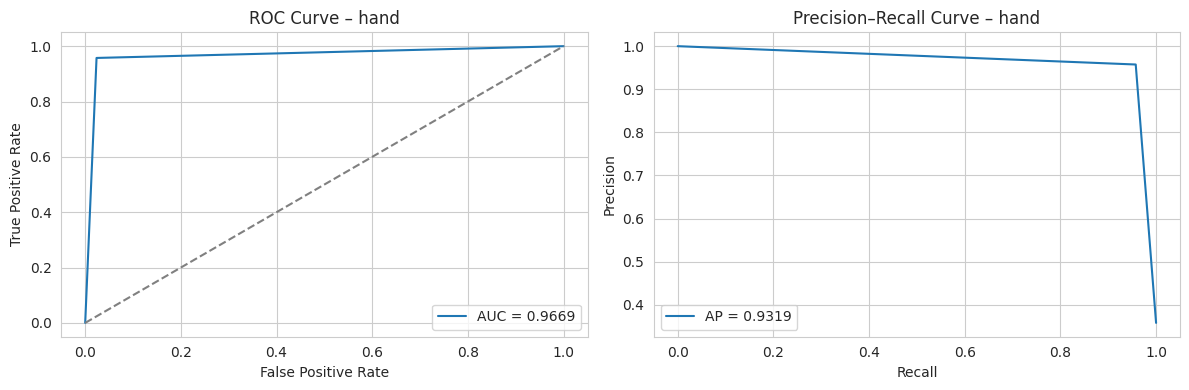

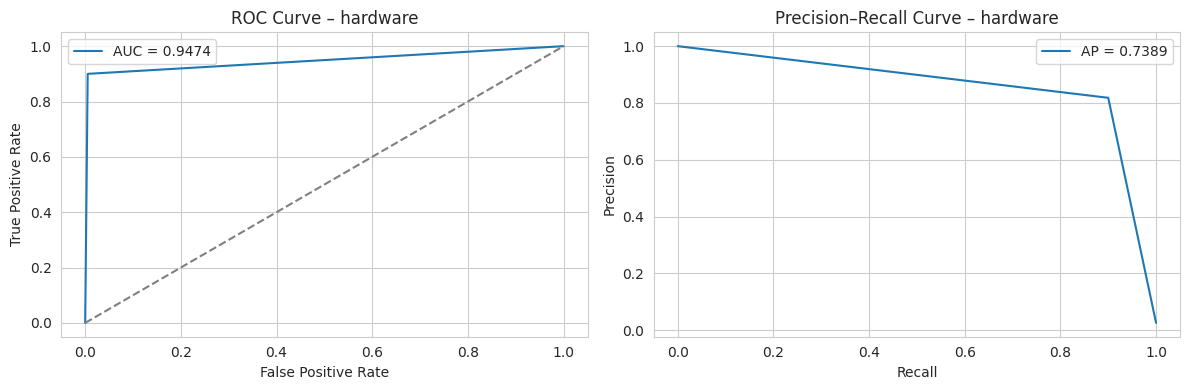

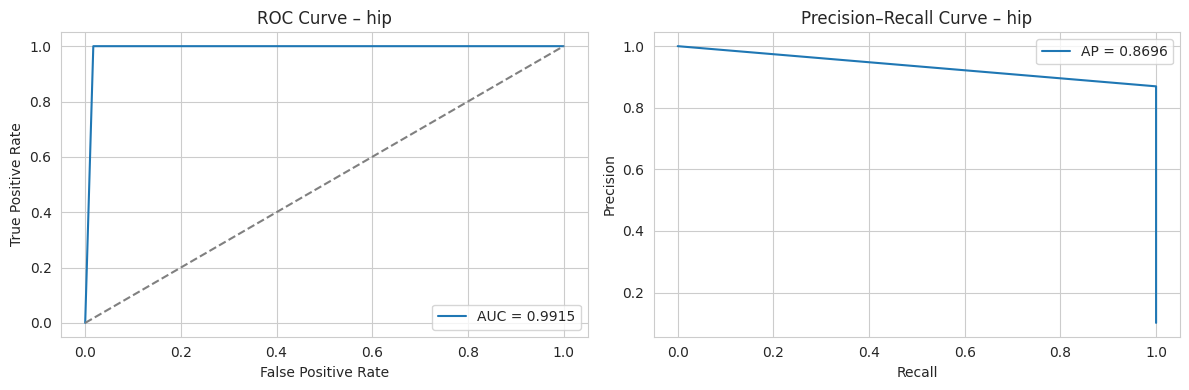

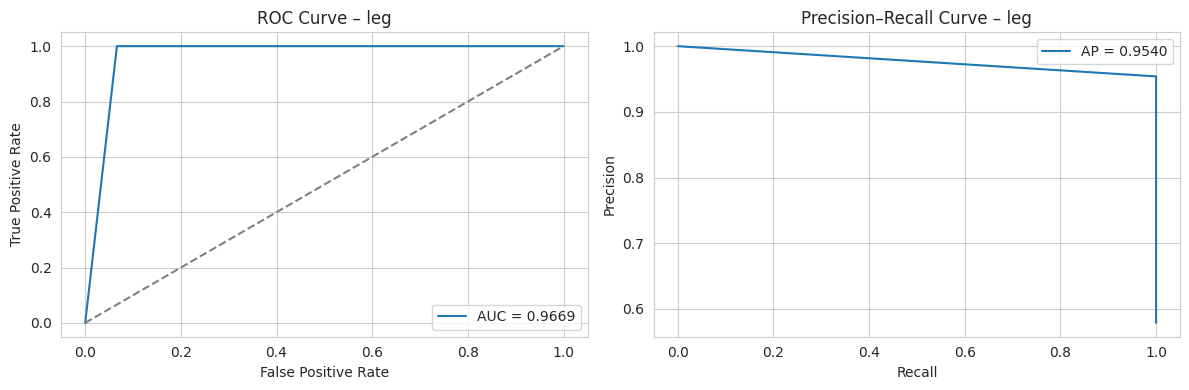

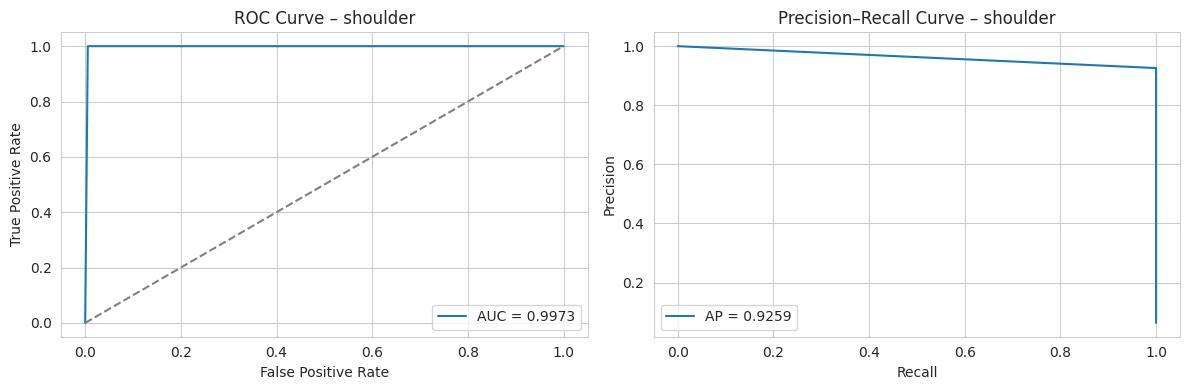

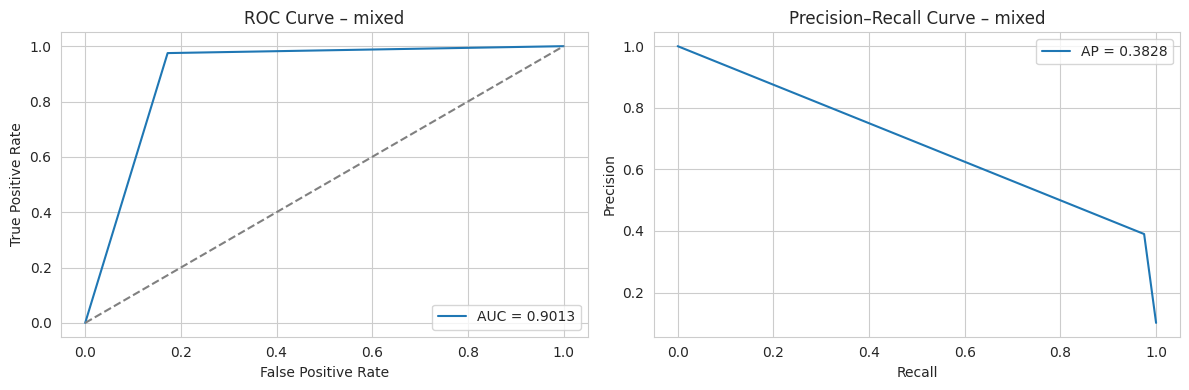

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)

# ============================
# PLOT ROC & PRC PER LABEL
# ============================
binary_labels = label_cols[:-1]  # skip fracture_count

for i, col in enumerate(binary_labels):
    yt = y_true[:, i]
    yp = y_pred[:, i]
    
    # If class has only 0 or only 1 → cannot compute curves
    if len(np.unique(yt)) < 2:
        print(f"⚠️ Skipped {col}: Only one class present")
        continue
    
    # Compute scores
    try:
        roc_auc = roc_auc_score(yt, yp)
        fpr, tpr, _ = roc_curve(yt, yp)
    except:
        roc_auc = None
        fpr, tpr = None, None

    try:
        pr_auc = average_precision_score(yt, yp)
        precision, recall, _ = precision_recall_curve(yt, yp)
    except:
        pr_auc = None
        precision, recall = None, None
    
    # ======================
    # PLOT 1 ROW × 2 COLUMNS
    # ======================
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ---------- ROC CURVE ----------
    ax = axes[0]
    if roc_auc is not None:
        ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
    ax.set_title(f"ROC Curve – {col}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()

    # ---------- PRC CURVE ----------
    ax = axes[1]
    if pr_auc is not None:
        ax.plot(recall, precision, label=f"AP = {pr_auc:.4f}")
    ax.set_title(f"Precision–Recall Curve – {col}")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.legend()

    plt.tight_layout()
    plt.show()

## Other Model Classification

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as T
import torchvision.models as models

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [8]:
df = pd.read_csv("/kaggle/working/dataset_appended.csv")
df["fracture_count_class"] = df["fracture_count"].clip(0, 4).astype(int)

train_dir = "/kaggle/input/fracatlas-augmented-fixed/train/images"
val_dir   = "/kaggle/input/fracatlas-augmented-fixed/valid/images"
test_dir  = "/kaggle/input/fracatlas-augmented-fixed/test/images"

train_df = df[df["image_id"].isin(os.listdir(train_dir))].copy()
val_df   = df[df["image_id"].isin(os.listdir(val_dir))].copy()
test_df  = df[df["image_id"].isin(os.listdir(test_dir))].copy()

class FracDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.multilabel_cols = ["fractured","hand","hardware","hip","leg","shoulder","mixed"]
        self.transform = T.Compose([
            T.Resize((224,224)),
            T.ToTensor(),
            T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
        ])
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(f"{self.img_dir}/{row.image_id}").convert("RGB")
        img = self.transform(img)
        multilabel = torch.tensor(row[self.multilabel_cols].values.astype(float), dtype=torch.float32)
        fracture_class = torch.tensor(int(row["fracture_count_class"]), dtype=torch.long)
        return img, multilabel, fracture_class

train_dl = DataLoader(FracDataset(train_df, train_dir), batch_size=32, shuffle=True, num_workers=2)
val_dl   = DataLoader(FracDataset(val_df, val_dir), batch_size=32, shuffle=False, num_workers=2)
test_dl  = DataLoader(FracDataset(test_df, test_dir), batch_size=32, shuffle=False, num_workers=2)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
import torch
import torch.nn as nn
import torchvision.models as models
import timm


# ===============================================================
# 1. DenseNet121 (Baseline Medis Paling Umum)
# ===============================================================

class MultiTask_DenseNet121(nn.Module):
    def __init__(self):
        super().__init__()
        m = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
        self.backbone = nn.Sequential(*list(m.features.children()))
        self.pool = nn.AdaptiveAvgPool2d(1)

        dim = 1024  # DenseNet121 output channels
        self.multi_head = nn.Linear(dim, 7)
        self.count_head = nn.Linear(dim, 5)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x).flatten(1)
        return self.multi_head(x), self.count_head(x)



# ===============================================================
# 2. ResNeSt-50 (Detail Halus)
# timm model: "resnest50d"
# ===============================================================

class MultiTask_ResNeSt50(nn.Module):
    def __init__(self):
        super().__init__()
        m = timm.create_model("resnest50d", pretrained=True, num_classes=0)  
        dim = m.num_features

        self.backbone = m
        self.multi_head = nn.Linear(dim, 7)
        self.count_head = nn.Linear(dim, 5)

    def forward(self, x):
        f = self.backbone(x)
        return self.multi_head(f), self.count_head(f)



# ===============================================================
# 3. EfficientNet-B2 (atau B3 → tinggal ganti param)
# timm model: "efficientnet_b2"
# ===============================================================

class MultiTask_EfficientNetB2(nn.Module):
    def __init__(self, version="b2"):
        super().__init__()

        model_name = f"efficientnet_{version}"
        m = timm.create_model(model_name, pretrained=True, num_classes=0)
        dim = m.num_features

        self.backbone = m
        self.multi_head = nn.Linear(dim, 7)
        self.count_head = nn.Linear(dim, 5)

    def forward(self, x):
        f = self.backbone(x)
        return self.multi_head(f), self.count_head(f)



# ===============================================================
# 4. Inception-ResNetV2 (Untuk anatomi kompleks)
# timm model: "inception_resnet_v2"
# ===============================================================

class MultiTask_InceptionResNetV2(nn.Module):
    def __init__(self):
        super().__init__()
        m = timm.create_model("inception_resnet_v2", pretrained=True, num_classes=0)
        dim = m.num_features  # 1536 dim

        self.backbone = m
        self.multi_head = nn.Linear(dim, 7)
        self.count_head = nn.Linear(dim, 5)

    def forward(self, x):
        f = self.backbone(x)
        return self.multi_head(f), self.count_head(f)



# ===============================================================
# INISIALISASI SEMUA MODEL
# ===============================================================

model_densenet   = MultiTask_DenseNet121().to(device)
model_resnest    = MultiTask_ResNeSt50().to(device)
model_effb2      = MultiTask_EfficientNetB2("b2").to(device)   # ganti "b3" kalau mau EfficientNet-B3
model_incepres   = MultiTask_InceptionResNetV2().to(device)

bce_loss = nn.BCEWithLogitsLoss()
ce_loss  = nn.CrossEntropyLoss()

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/36.8M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/224M [00:00<?, ?B/s]

In [10]:
from tqdm import tqdm
import torch.optim as optim
import torch.nn.utils as utils

def run_epoch(model, dl, opt=None):
    train = opt is not None
    model.train() if train else model.eval()
    
    loop = tqdm(dl, leave=False)
    total = multi = count = 0
    
    for imgs, y_m, y_c in loop:
        imgs, y_m, y_c = imgs.to(device), y_m.to(device), y_c.to(device)
        
        if train:
            opt.zero_grad()

        o_m, o_c = model(imgs)
        lm = bce_loss(o_m, y_m)
        lc = ce_loss(o_c, y_c)

        # --- balanced combined loss ---
        loss = 1.2 * lm + 0.8 * lc

        if train:
            loss.backward()
            utils.clip_grad_norm_(model.parameters(), 5.0)  # 🔥 prevent exploding
            opt.step()

        total += loss.item()
        multi += lm.item()
        count += lc.item()
        
        loop.set_postfix({"L": loss.item(), "M": lm.item(), "C": lc.item()})
    
    n = len(dl)
    return total/n, multi/n, count/n



def train_model(model, epochs=5, lr=1e-4):
    opt = optim.Adam(model.parameters(), lr=lr)

    # 🔥 Cosine warm restart improves convergence
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        opt, T_0=3, T_mult=2
    )

    for e in range(1, epochs+1):
        print(f"\nEpoch {e}")
        
        tr, tm, tc = run_epoch(model, train_dl, opt)
        va, vm, vc = run_epoch(model, val_dl)

        scheduler.step()

        print(f"Train {tr:.4f} {tm:.4f} {tc:.4f}")
        print(f"Val   {va:.4f} {vm:.4f} {vc:.4f}")

In [11]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    mean_absolute_error, mean_squared_error, r2_score
)
import numpy as np
import torch
import pandas as pd

def evaluate_model_full(model, name="Model"):
    model.eval()
    ytm, ypm, ytc, ypc = [], [], [], []

    with torch.no_grad():
        for x, m, c in test_dl:
            x = x.to(device)
            om, oc = model(x)

            pm = (torch.sigmoid(om).cpu().numpy() > 0.5).astype(int)
            pc = oc.argmax(1).cpu().numpy()

            ytm.append(m.numpy())
            ypm.append(pm)
            ytc.append(c.numpy())
            ypc.append(pc)

    ytm = np.vstack(ytm)      # multilabel true
    ypm = np.vstack(ypm)      # multilabel pred
    ytc = np.hstack(ytc)      # true fracture count
    ypc = np.hstack(ypc)      # predicted fracture count

    labels = ["fractured","hand","hardware","hip","leg","shoulder","mixed"]
    rows = []

    # =====================================================
    # 1. METRIK UNTUK MULTILABEL (binary per class)
    # =====================================================
    for i, cls in enumerate(labels):
        yt = ytm[:, i]
        yp = ypm[:, i]

        acc  = accuracy_score(yt, yp)
        prec = precision_score(yt, yp, zero_division=0)
        rec  = recall_score(yt, yp, zero_division=0)
        f1   = f1_score(yt, yp, zero_division=0)

        # ROC-AUC dan PRC-AUC butuh probabilitas 0/1 yang stabil
        try: 
            roc = roc_auc_score(yt, yp)
        except:
            roc = 0.0
        try: 
            prc = average_precision_score(yt, yp)
        except:
            prc = 0.0

        rows.append([
            name, cls, acc, prec, rec, f1, roc, prc
        ])

    # =====================================================
    # 2. METRIK UNTUK FRACTURE COUNT (multiclass regression-like)
    # =====================================================
    acc_c  = accuracy_score(ytc, ypc)
    f1_c   = f1_score(ytc, ypc, average="macro")
    mae_c  = mean_absolute_error(ytc, ypc)
    mse_c  = mean_squared_error(ytc, ypc)
    rmse_c = np.sqrt(mse_c)
    r2_c   = r2_score(ytc, ypc)

    rows.append([
        name, "fracture_count",
        acc_c, 
        "-", "-", "-",  # precision/recall/f1 not meaningful for regression
        "-",            # ROC
        "-",            # PRC
    ])

    # Append regresi metrics sebagai baris terpisah atau bisa digabung
    rows.append([name, "fracture_count_MAE", mae_c, "-", "-", "-", "-", "-"])
    rows.append([name, "fracture_count_MSE", mse_c, "-", "-", "-", "-", "-"])
    rows.append([name, "fracture_count_RMSE", rmse_c, "-", "-", "-", "-", "-"])
    rows.append([name, "fracture_count_R2", r2_c, "-", "-", "-", "-", "-"])

    df = pd.DataFrame(rows, columns=[
        "Model","Label",
        "Accuracy","Precision","Recall","F1",
        "ROC-AUC","PRC-AUC"
    ])
    
    return df, ytm, ypm, ytc, ypc

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["fractured","hand","hardware","hip","leg","shoulder","mixed"]

def plot_confusion_all(ym_t, ym_p, yc_t, yc_p):
    for i, cls in enumerate(labels):
        cm = confusion_matrix(ym_t[:,i], ym_p[:,i])
        plt.figure(figsize=(3,3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(cls)
        plt.show()
    cm = confusion_matrix(yc_t, yc_p)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title("fracture_count")
    plt.show()


===== TRAINING densenet121 =====

Epoch 1


Train 0.7387 0.2546 0.5414
Val   0.5454 0.1154 0.5088

Epoch 2


Train 0.2547 0.0882 0.1861
Val   0.4586 0.0920 0.4353

Epoch 3


Train 0.1097 0.0533 0.0573
Val   0.4244 0.0837 0.4051

Epoch 4


Train 0.1205 0.0470 0.0801
Val   0.5588 0.1033 0.5435

Epoch 5


Train 0.0915 0.0343 0.0629
Val   0.5456 0.0976 0.5356

===== EVALUATION densenet121 =====


          Model                Label  Accuracy Precision    Recall        F1  \
0   densenet121            fractured  0.880711   0.66129   0.61194  0.635659   
1   densenet121                 hand  0.982234  0.985507  0.964539   0.97491   
2   densenet121             hardware  0.994924       0.9       0.9       0.9   
3   densenet121                  hip  0.997462   0.97561       1.0  0.987654   
4   densenet121                  leg  0.984772  0.982609  0.991228    0.9869   
5   densenet121             shoulder  0.997462  0.961538       1.0  0.980392   
6   densenet121                mixed  0.984772  0.904762      0.95  0.926829   
7   densenet121       fracture_count  0.847716         -         -         -   
8   densenet121   fracture_count_MAE  0.175127         -         -         -   
9   densenet121   fracture_count_MSE  0.220812         -         -         -   
10  densenet121  fracture_count_RMSE  0.469907         -         -         -   
11  densenet121    fracture_count_R2  0.

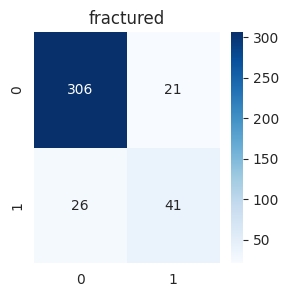

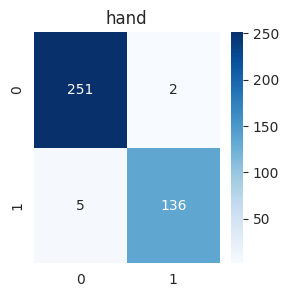

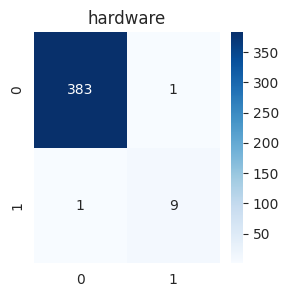

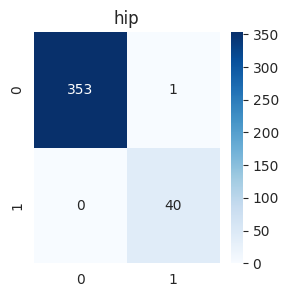

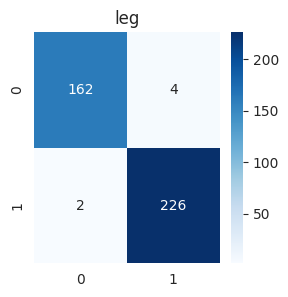

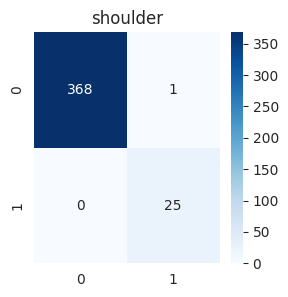

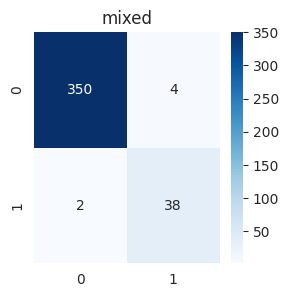

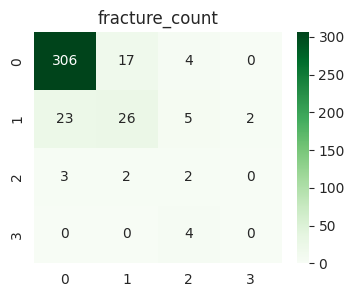


===== TRAINING resnest50 =====

Epoch 1


Train 0.6349 0.2007 0.4927
Val   0.4538 0.0965 0.4225

Epoch 2


Train 0.2369 0.0656 0.1976
Val   0.4625 0.0853 0.4502

Epoch 3


Train 0.0788 0.0284 0.0559
Val   0.4564 0.0862 0.4413

Epoch 4


Train 0.1269 0.0367 0.1036
Val   0.6413 0.1216 0.6193

Epoch 5


Train 0.0962 0.0287 0.0772
Val   0.6006 0.1039 0.5949

===== EVALUATION resnest50 =====


        Model                Label  Accuracy Precision    Recall        F1  \
0   resnest50            fractured  0.860406  0.585714   0.61194   0.59854   
1   resnest50                 hand  0.977157  0.978261  0.957447  0.967742   
2   resnest50             hardware  0.987310  0.777778       0.7  0.736842   
3   resnest50                  hip  1.000000       1.0       1.0       1.0   
4   resnest50                  leg  0.977157  0.978166  0.982456  0.980306   
5   resnest50             shoulder  0.997462  0.961538       1.0  0.980392   
6   resnest50                mixed  0.977157  0.918919      0.85  0.883117   
7   resnest50       fracture_count  0.845178         -         -         -   
8   resnest50   fracture_count_MAE  0.175127         -         -         -   
9   resnest50   fracture_count_MSE  0.215736         -         -         -   
10  resnest50  fracture_count_RMSE  0.464474         -         -         -   
11  resnest50    fracture_count_R2  0.174228         -         -

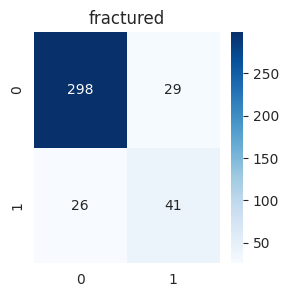

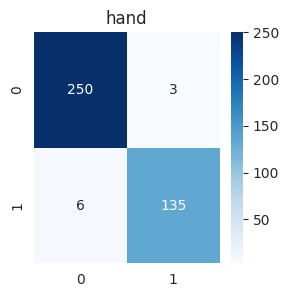

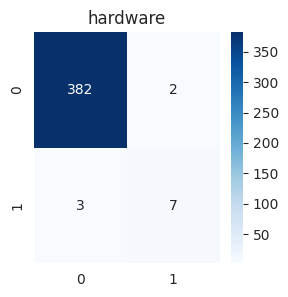

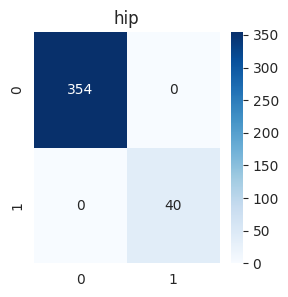

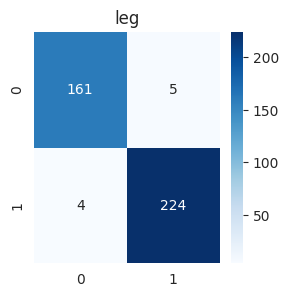

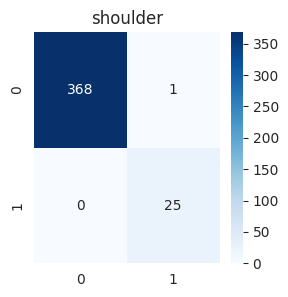

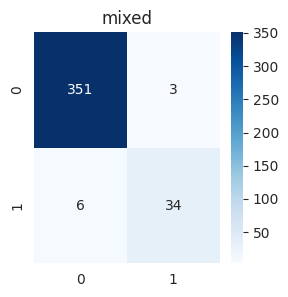

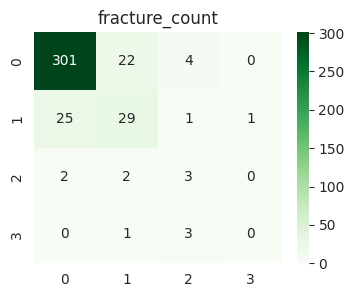


===== TRAINING efficientnet_b2 =====

Epoch 1


Train 0.7986 0.2944 0.5566
Val   0.4660 0.1166 0.4076

Epoch 2


Train 0.2639 0.1011 0.1782
Val   0.4510 0.0942 0.4225

Epoch 3


Train 0.1426 0.0653 0.0803
Val   0.4374 0.0896 0.4124

Epoch 4


Train 0.1251 0.0531 0.0768
Val   0.4957 0.0906 0.4838

Epoch 5


Train 0.0711 0.0315 0.0416
Val   0.5383 0.0958 0.5291

===== EVALUATION efficientnet_b2 =====


              Model                Label  Accuracy Precision    Recall  \
0   efficientnet_b2            fractured  0.890863  0.671429  0.701493   
1   efficientnet_b2                 hand  0.974619  0.985185  0.943262   
2   efficientnet_b2             hardware  0.992386  0.888889       0.8   
3   efficientnet_b2                  hip  0.997462   0.97561       1.0   
4   efficientnet_b2                  leg  0.984772  0.978448  0.995614   
5   efficientnet_b2             shoulder  1.000000       1.0       1.0   
6   efficientnet_b2                mixed  0.984772  0.947368       0.9   
7   efficientnet_b2       fracture_count  0.862944         -         -   
8   efficientnet_b2   fracture_count_MAE  0.164975         -         -   
9   efficientnet_b2   fracture_count_MSE  0.241117         -         -   
10  efficientnet_b2  fracture_count_RMSE  0.491036         -         -   
11  efficientnet_b2    fracture_count_R2  0.077079         -         -   

          F1   ROC-AUC   PRC-AUC  
0 

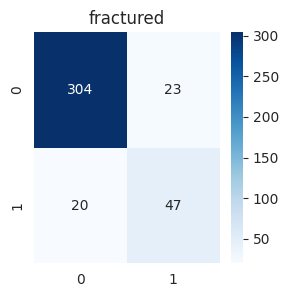

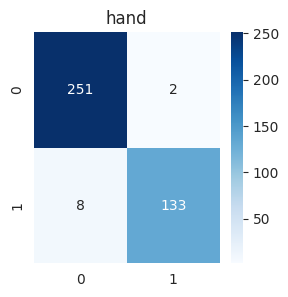

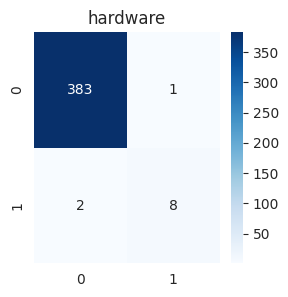

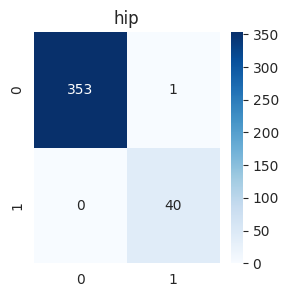

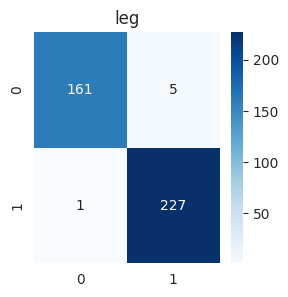

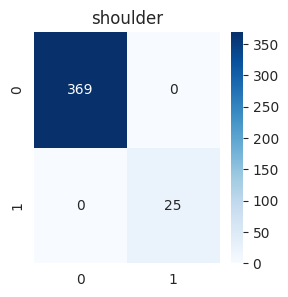

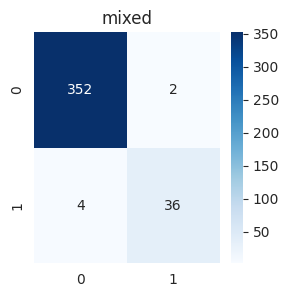

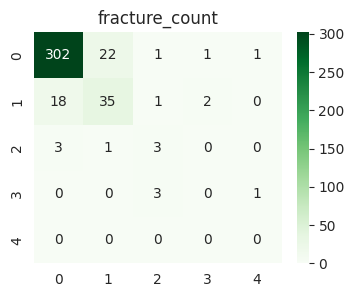


===== TRAINING inception_resnet_v2 =====

Epoch 1


Train 0.6832 0.2368 0.4988
Val   0.4283 0.1012 0.3836

Epoch 2


Train 0.2146 0.0766 0.1533
Val   0.4418 0.0884 0.4196

Epoch 3


Train 0.0871 0.0434 0.0438
Val   0.4690 0.0901 0.4511

Epoch 4


Train 0.1147 0.0421 0.0803
Val   0.5540 0.1024 0.5389

Epoch 5


Train 0.0940 0.0322 0.0691
Val   0.5719 0.1072 0.5541

===== EVALUATION inception_resnet_v2 =====


                  Model                Label  Accuracy Precision    Recall  \
0   inception_resnet_v2            fractured  0.878173  0.731707  0.447761   
1   inception_resnet_v2                 hand  0.969543  0.957447  0.957447   
2   inception_resnet_v2             hardware  0.987310  0.857143       0.6   
3   inception_resnet_v2                  hip  0.989848  0.909091       1.0   
4   inception_resnet_v2                  leg  0.979695  0.982456  0.982456   
5   inception_resnet_v2             shoulder  0.994924  0.925926       1.0   
6   inception_resnet_v2                mixed  0.979695       0.9       0.9   
7   inception_resnet_v2       fracture_count  0.857868         -         -   
8   inception_resnet_v2   fracture_count_MAE  0.164975         -         -   
9   inception_resnet_v2   fracture_count_MSE  0.215736         -         -   
10  inception_resnet_v2  fracture_count_RMSE  0.464474         -         -   
11  inception_resnet_v2    fracture_count_R2  0.174228         -

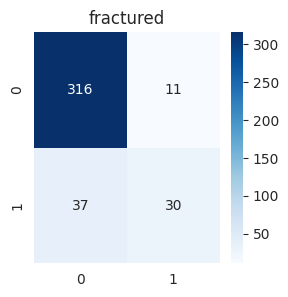

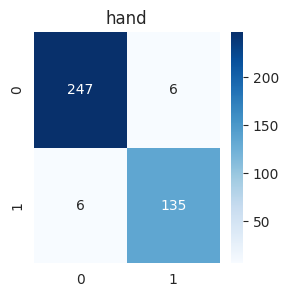

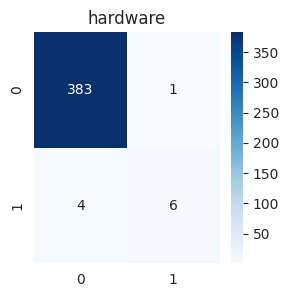

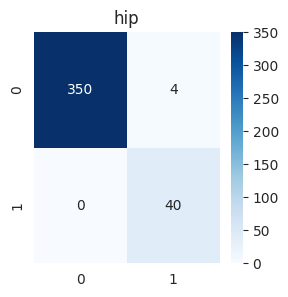

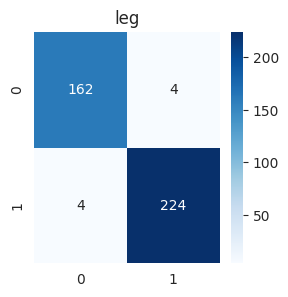

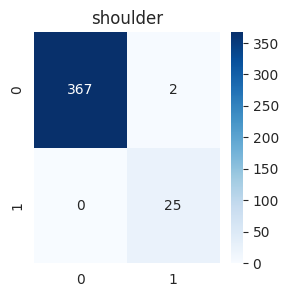

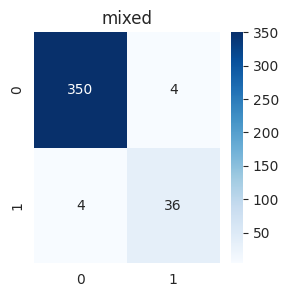

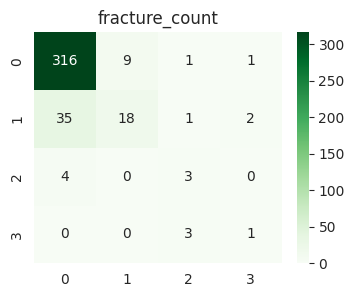

In [13]:
models = {
    "densenet121":        model_densenet,
    "resnest50":          model_resnest,
    "efficientnet_b2":    model_effb2,      # ganti ke _b3 kalau kamu pakai B3
    "inception_resnet_v2": model_incepres,
}

all_results = []

for name, model in models.items():
    print(f"\n===== TRAINING {name} =====")
    # kalau train_model-mu pakai argumen lr, boleh gini:
    # lr_map = {
    #     "densenet121": 3e-4,
    #     "resnest50": 1e-4,
    #     "efficientnet_b2": 3e-4,
    #     "inception_resnet_v2": 3e-4,
    # }
    # train_model(model, epochs=5, lr=lr_map[name])

    train_model(model, epochs=5)

    print(f"\n===== EVALUATION {name} =====")
    df_metrics, ym_t, ym_p, yc_t, yc_p = evaluate_model_full(model, name=name)

    print(df_metrics)
    all_results.append(df_metrics)

    plot_confusion_all(ym_t, ym_p, yc_t, yc_p)

In [14]:
final_table = pd.concat(all_results, ignore_index=True)
print("\n===== FINAL COMPARISON TABLE =====")
print(final_table)


===== FINAL COMPARISON TABLE =====
                  Model                Label  Accuracy Precision    Recall  \
0           densenet121            fractured  0.880711   0.66129   0.61194   
1           densenet121                 hand  0.982234  0.985507  0.964539   
2           densenet121             hardware  0.994924       0.9       0.9   
3           densenet121                  hip  0.997462   0.97561       1.0   
4           densenet121                  leg  0.984772  0.982609  0.991228   
5           densenet121             shoulder  0.997462  0.961538       1.0   
6           densenet121                mixed  0.984772  0.904762      0.95   
7           densenet121       fracture_count  0.847716         -         -   
8           densenet121   fracture_count_MAE  0.175127         -         -   
9           densenet121   fracture_count_MSE  0.220812         -         -   
10          densenet121  fracture_count_RMSE  0.469907         -         -   
11          densenet121    f